## Emotion Detection using Bidirectional LSTM

### Importing Libraries

In [ ]:
import numpy as np
import keras
from  keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import os
import pandas as pd
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


### Reading the dataframe

In [ ]:
df_train = pd.read_csv('/content/drive/My Drive/train.txt', header =None, sep =';', names = ['Input','Sentiment'], encoding='utf-8')
df_test = pd.read_csv('/content/drive/My Drive/test.txt', header = None, sep =';', names = ['Input','Sentiment'],encoding='utf-8')
df_val=pd.read_csv('/content/drive/My Drive/val.txt',header=None,sep=';',names=['Input','Sentiment'],encoding='utf-8')


In [ ]:
df_train.Sentiment.value_counts()

Sentiment
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

In [ ]:
X=df_train['Input']

In [ ]:
lst=[]
for i in X:
  lst.append(len(i))

In [ ]:
len1=pd.DataFrame(lst)
len1.describe()

,0
count,16000.000000
mean,96.845812
std,55.904953
min,7.000000
25%,53.000000
50%,86.000000
75%,129.000000
max,300.000000


In [ ]:
cts=[]
for i in range(7,301):
   ct=0
   for k in lst:
     if k==i:
       ct+=1
   cts.append(ct)

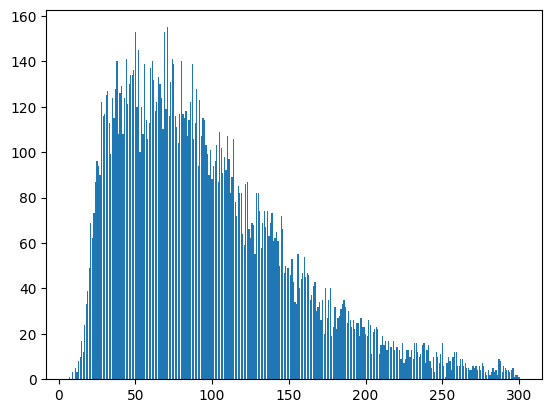

In [ ]:
plt.bar(range(7,301),cts)
plt.show()

### Converting the sentence into word vectors

In [ ]:

tokenizer=Tokenizer(15212,lower=True,oov_token='UNK')
tokenizer.fit_on_texts(X)

In [ ]:
len(tokenizer.word_index)

15213

In [ ]:
X_train=tokenizer.texts_to_sequences(X)
X_train_pad=pad_sequences(X_train,maxlen=80,padding='post')

In [ ]:
df_train['Sentiment']=df_train.Sentiment.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})

In [ ]:
Y_train=df_train['Sentiment'].values

### One hot encoding

In [ ]:
Y_train_f=to_categorical(Y_train)

In [ ]:
Y_train_f[:6]

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]], dtype=float32)

In [ ]:
X_val=df_val['Input']
Y_val=df_val.Sentiment.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})

In [ ]:
X_val_f=tokenizer.texts_to_sequences(X_val)
X_val_pad=pad_sequences(X_val_f,maxlen=80,padding='post')

In [ ]:
Y_val_f=to_categorical(Y_val)

In [ ]:
Y_val_f[:6]

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

### Creating a Model

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM,Bidirectional,Dense,Embedding,Dropout

In [ ]:
model=Sequential()
model.add(Embedding(15212,64,input_length=80))
model.add(Dropout(0.6))
model.add(Bidirectional(LSTM(80,return_sequences=True)))
model.add(Bidirectional(LSTM(160)))
model.add(Dense(6,activation='softmax'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 80, 64)            973568    
                                                                 
 dropout_1 (Dropout)         (None, 80, 64)            0         
                                                                 
 bidirectional_2 (Bidirecti  (None, 80, 160)           92800     
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 320)               410880    
 onal)                                                           
                                                                 
 dense_1 (Dense)             (None, 6)                 1926      
                                                                 
Total params: 1479174 (5.64 MB)
Trainable params: 1479

### Compiling and running the model

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
hist=model.fit(X_train_pad,Y_train_f,epochs=12,validation_data=(X_val_pad,Y_val_f))

Epoch 1/12
500/500 [==============================] - 221s 427ms/step - loss: 1.2105 - accuracy: 0.5247 - val_loss: 0.7012 - val_accuracy: 0.7230
Epoch 2/12
500/500 [==============================] - 220s 441ms/step - loss: 0.4981 - accuracy: 0.8098 - val_loss: 0.2923 - val_accuracy: 0.8970
Epoch 3/12
500/500 [==============================] - 209s 417ms/step - loss: 0.2638 - accuracy: 0.9027 - val_loss: 0.2239 - val_accuracy: 0.9120
Epoch 4/12
500/500 [==============================] - 208s 416ms/step - loss: 0.1865 - accuracy: 0.9306 - val_loss: 0.1868 - val_accuracy: 0.9215
Epoch 5/12
500/500 [==============================] - 209s 418ms/step - loss: 0.1404 - accuracy: 0.9466 - val_loss: 0.1760 - val_accuracy: 0.9280
Epoch 6/12
500/500 [==============================] - 209s 417ms/step - loss: 0.1192 - accuracy: 0.9523 - val_loss: 0.1865 - val_accuracy: 0.9250
Epoch 7/12
500/500 [==============================] - 209s 417ms/step - loss: 0.0985 - accuracy: 0.9608 - val_loss: 0.1743 -

### Plotting the Loss and Accuracy Curves

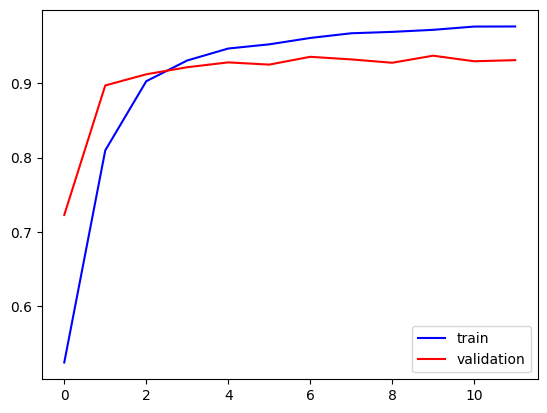

In [ ]:
plt.plot(hist.history['accuracy'],c='b',label='train')
plt.plot(hist.history['val_accuracy'],c='r',label='validation')
plt.legend(loc='lower right')
plt.show()

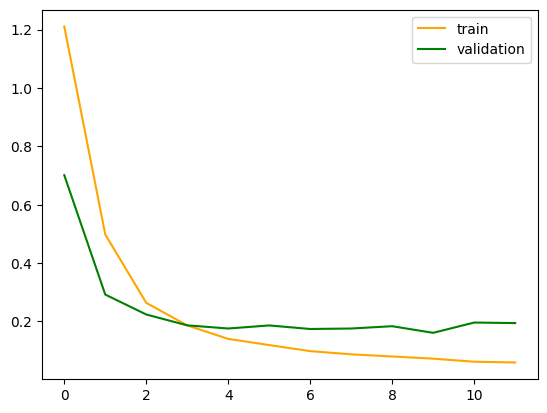

In [ ]:
plt.plot(hist.history['loss'],c='orange',label='train')
plt.plot(hist.history['val_loss'],c='g',label='validation')
plt.legend(loc='upper right')
plt.show()

### Checking for Test Data

In [ ]:
 X_test=df_test['Input']
Y_test=df_test.Sentiment.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})

In [ ]:

X_test_f=tokenizer.texts_to_sequences(X_test)
X_test_pad=pad_sequences(X_test_f,maxlen=80,padding='post')

In [ ]:
Y_test_f=to_categorical(Y_test)

In [ ]:
X_test_pad.shape

(2000, 80)

In [ ]:
Y_test_f[:7]

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

### Accuracy for Test Data

In [ ]:
model.evaluate(X_test_pad,Y_test_f)

63/63 [==============================] - 7s 111ms/step - loss: 0.1836 - accuracy: 0.9235


[0.1835567206144333, 0.9235000014305115]

### Plotting the Confusion matrix

In [ ]:
Y_pred=model.predict(X_test_pad)

63/63 [==============================] - 10s 123ms/step


In [ ]:
Y_pred_classes = np.argmax(Y_pred, axis=1)

In [ ]:
conf_matrix = confusion_matrix(Y_test, Y_pred_classes)

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

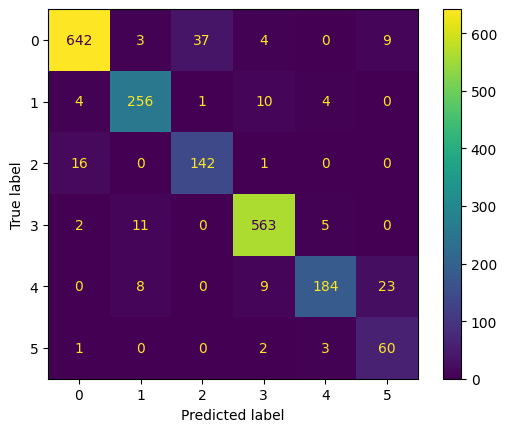

In [ ]:
disp.plot()
plt.show()

### Creating the function

In [ ]:
def get_key(values):
    dictionary = {'joy': 0, 'anger': 1, 'love': 2, 'sadness': 3, 'fear': 4, 'surprise': 5}
    keys = []
    for value in values:
        max_index = np.argmax(value)
        for key, index in dictionary.items():
            if index == max_index:
                keys.append(key)
    return keys

In [ ]:
def predict(sentence):
  sentence_lst=[]
  sentence_lst.append(sentence)
  sentence_seq=tokenizer.texts_to_sequences(sentence_lst)
  sentence_padded=pad_sequences(sentence_seq,maxlen=80,padding='post')
  ans=get_key(model.predict(sentence_padded))
  print("The emotion predicted is",ans)

### Checking our sentence

In [ ]:
predict(str(input('Enter a sentence : ')))

Enter a sentence : i didnt feel humiliated
1/1 [==============================] - 0s 32ms/step
The emotion predicted is ['sadness']


In [ ]:
predict(str(input('Enter a sentence : ')))


Enter a sentence : im grabbing a minute to post i feel greedy wrong
1/1 [==============================] - 0s 41ms/step
The emotion predicted is ['anger']


In [ ]:
predict(str(input('Enter a sentence : ')))

Enter a sentence : i am ever feeling nostalgic about the fireplace i will know that it is still on the property
1/1 [==============================] - 0s 22ms/step
The emotion predicted is ['love']


In [ ]:
predict(str(input('Enter a sentence : ')))

Enter a sentence : ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny
1/1 [==============================] - 0s 22ms/step
The emotion predicted is ['surprise']
